(307, 2)


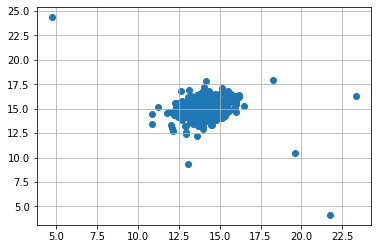

In [56]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


data = loadmat('ex8data1.mat')
X = data['X']
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.grid()

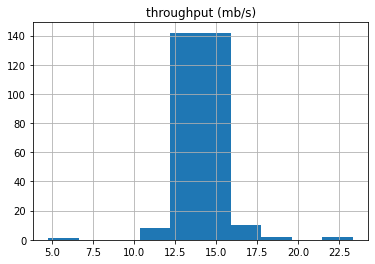

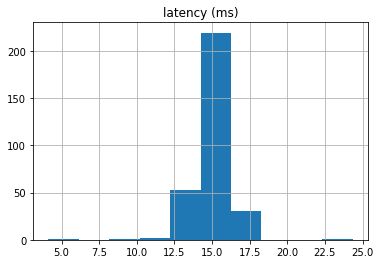

In [57]:
titles = ["throughput (mb/s)", "latency (ms)"]
for i in range(X.shape[1]):
    plt.figure()
    plt.hist(X[:, i])
    plt.title(titles[i])
    plt.grid()

In [58]:
def estimate_gaussian(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X, axis=0)
    return mu, sigma

In [59]:
Xval = data['Xval']
yval = data['yval']
print(Xval.shape, yval.shape)

(307, 2) (307, 1)


In [60]:
from scipy import stats
mu, sigma = estimate_gaussian(X)
print(mu, sigma)
pdf_s = []

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


In [61]:
for i in range(X.shape[1]):
    feature = X[0:50,i]
    pdf = stats.norm.pdf(feature,loc = mu[i],scale=sigma[i])
    pdf_s.append(pdf)

In [62]:
pval = np.zeros(Xval.shape)
for i in range(Xval.shape[1]):
    feature = Xval[:,i]
    pval[:,i] = stats.norm.pdf(feature,loc = mu[i],scale=sigma[i])

In [63]:
from sklearn.metrics import f1_score
def select_threshold(pval, yval):
    min_p = np.min(pval)
    max_p = np.max(pval)
    best_epsilon = 0
    best_f1 = 0
    selected = None
    for epsilon in np.linspace(min_p, max_p, 1000):
        select = np.where(pval<epsilon, True, False)
        f1 = f1_score(yval, select)
        if f1 > best_f1:
            best_epsilon = epsilon
            best_f1 = f1
            selected = select
    return best_epsilon, best_f1, selected

In [65]:
best_epsilons = []

for i in range(Xval.shape[1]):
    feature_p_val = pval[:,i]
    best_epsilon, best_f1, selected = select_threshold(feature_p_val, yval)
    print(best_f1)
    best_epsilons.append(best_epsilon)

0.8
0.6250000000000001


[0.0005899796186982346, 0.023210919211410812]


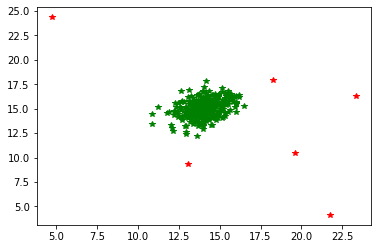

In [91]:
print(best_epsilons)
pdfs0 = stats.norm.pdf(X[:,0],loc = mu[0],scale=sigma[0])
pdfs1 = stats.norm.pdf(X[:,1], loc = mu[1],scale=sigma[1])
vals = np.logical_and(pdfs0>best_epsilons[0], pdfs1>best_epsilons[1])
not_vals = np.logical_not(vals)
plt.plot(X[vals,0], X[vals,1], 'g*')
plt.plot(X[not_vals,0], X[not_vals,1], 'r*')
plt.show()